In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [73]:
data = pd.read_excel('C:/Users/Manikanta Marreddy/Desktop/University_Clustering.xlsx')
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [74]:
x = np.random.uniform(0,1,50)
y = np.random.uniform(0,1,50)
rand_data = pd.DataFrame(columns=['x','y'])
rand_data.x = x
rand_data.y = y
rand_data.head()

,x,y
0,0.589951,0.495112
1,0.184773,0.095667
2,0.812800,0.348690
3,0.928759,0.720424
4,0.543978,0.120367


<AxesSubplot:xlabel='x', ylabel='y'>

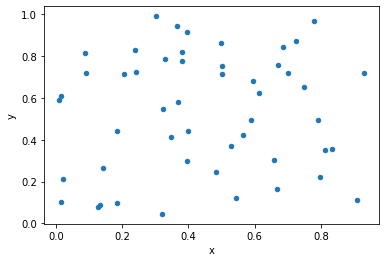

In [75]:
rand_data.plot(x='x',y='y', kind = 'scatter')

In [76]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=3).fit(rand_data)

<AxesSubplot:xlabel='x', ylabel='y'>

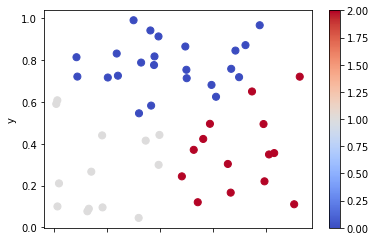

In [77]:
rand_data.plot(x='x',y='y',c = model1.labels_,kind = 'scatter',s=50,cmap = plt.cm.coolwarm)

In [78]:
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [79]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)
norm_data = norm_fun(data.iloc[ :,2:])
norm_data.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


TO DRAW SCREE PLOT OR ELBOW CURVE

In [80]:
twss = []
k = list(range(2,9))
for i in k:
    kmean = KMeans(n_clusters=i)
    kmean.fit(norm_data)
    twss.append(kmean.inertia_)
twss

[4.123452442397181,
 2.9556843285735432,
 2.2308047771916275,
 1.723590858389283,
 1.527380247762837,
 1.2337402672400788,
 1.055034218522236]

Text(0.5, 1.0, 'hgdgfhfkuhjgfhsghdj')

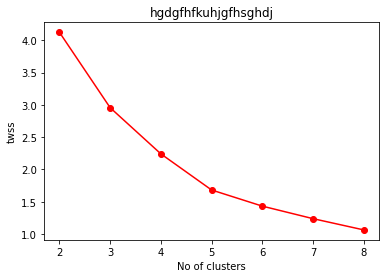

In [41]:
plt.plot(k,twss,'ro-');plt.xlabel('No of clusters');plt.ylabel('twss');plt.title('hgdgfhfkuhjgfhsghdj')

In [81]:
model1 = KMeans(n_clusters = 3)
model1.fit(norm_data)
model1.labels_


array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1,
       1, 2, 0])

In [82]:
cluster_labels = pd.Series(model1.labels_)
data['cluster_label'] = cluster_labels
data.head()
data = data.iloc[:,[8,0,1,2,3,4,5,6,7]]


In [85]:
data.iloc[:,1:8].groupby(data.cluster_label).mean()

,SAT,Top10,Accept,SFRatio,Expenses
cluster_label,,,,,
0,1353.181818,89.090909,24.090909,10.181818,38618.727273
1,1253.000000,77.700000,43.500000,12.900000,22008.200000
2,1061.500000,38.750000,70.000000,19.250000,9953.000000


In [92]:
data=data.sort_values(by=['cluster_label'])

In [94]:
data.to_csv('kmeanclusterdata1.csv')
os.getcwd()

'c:\\Users\\Manikanta Marreddy\\Desktop\\PR'